In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import accuracy_score,roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_csv('Downloads/thyroid_sample.csv')
df1=df.dropna()
df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26495 entries, 0 to 26494
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        26495 non-null  float64
 1   sex                        26495 non-null  float64
 2   TSH                        26495 non-null  float64
 3   T3                         26495 non-null  float64
 4   TT4                        26495 non-null  float64
 5   on_thyroxine               26495 non-null  float64
 6   query_on_thyroxine         26495 non-null  float64
 7   on_antithyroid_medication  26495 non-null  float64
 8   sick                       26495 non-null  float64
 9   pregnant                   26495 non-null  float64
 10  thyroid_surgery            26495 non-null  float64
 11  I131_treatment             26495 non-null  float64
 12  query_hypothyroid          26495 non-null  float64
 13  query_hyperthyroid         26495 non-null  flo

In [22]:
X = df1.drop('Class', axis=1)
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.873938478958294
                         precision    recall  f1-score   support

compensated hypothyroid       0.75      0.87      0.81      1044
           hyperthyroid       0.87      1.00      0.93      1066
               negative       0.91      0.71      0.80      1086
    primary hypothyroid       0.94      0.81      0.87      1038
  secondary hypothyroid       0.93      0.98      0.95      1065

               accuracy                           0.87      5299
              macro avg       0.88      0.87      0.87      5299
           weighted avg       0.88      0.87      0.87      5299



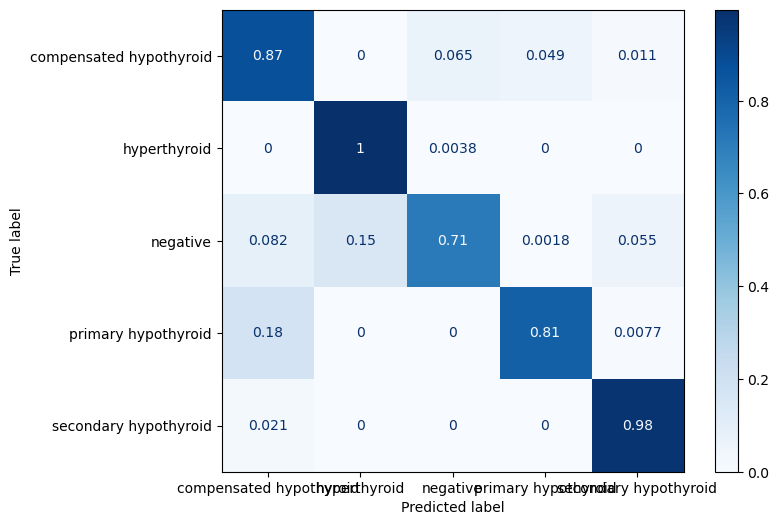

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

lr_prediction=lr.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(lr_prediction,y_test)


target_names=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid']
print(accuracy)
print(classification_report(y_test,lr_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, lr_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.6521985280241555
                         precision    recall  f1-score   support

compensated hypothyroid       0.68      0.28      0.40      1044
           hyperthyroid       0.66      0.99      0.79      1066
               negative       0.67      0.02      0.04      1086
    primary hypothyroid       0.48      0.98      0.65      1038
  secondary hypothyroid       0.96      1.00      0.98      1065

               accuracy                           0.65      5299
              macro avg       0.69      0.65      0.57      5299
           weighted avg       0.69      0.65      0.57      5299



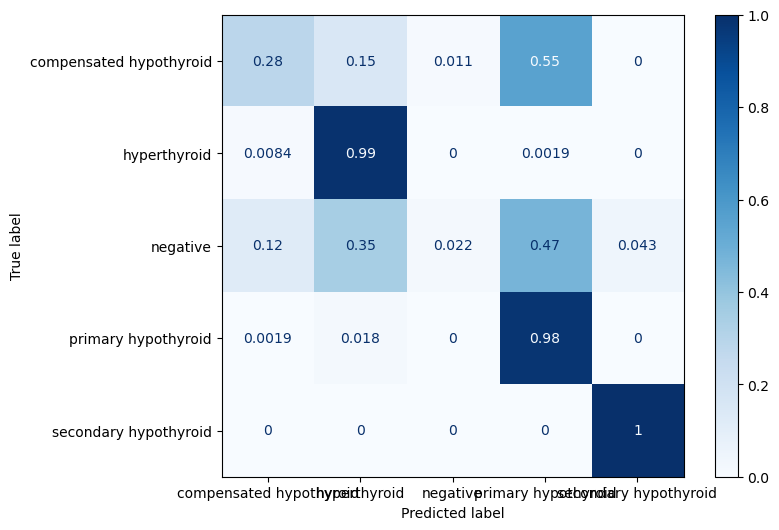

In [24]:
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(X_train,y_train)

gnb_prediction=Gnb.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(gnb_prediction,y_test)
print(accuracy)

target_names=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid']
print(classification_report(y_test,gnb_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, gnb_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.9852802415550104
                         precision    recall  f1-score   support

compensated hypothyroid       0.97      0.98      0.97      1044
           hyperthyroid       0.99      1.00      0.99      1066
               negative       0.97      0.96      0.96      1086
    primary hypothyroid       1.00      1.00      1.00      1038
  secondary hypothyroid       1.00      1.00      1.00      1065

               accuracy                           0.99      5299
              macro avg       0.99      0.99      0.99      5299
           weighted avg       0.99      0.99      0.99      5299



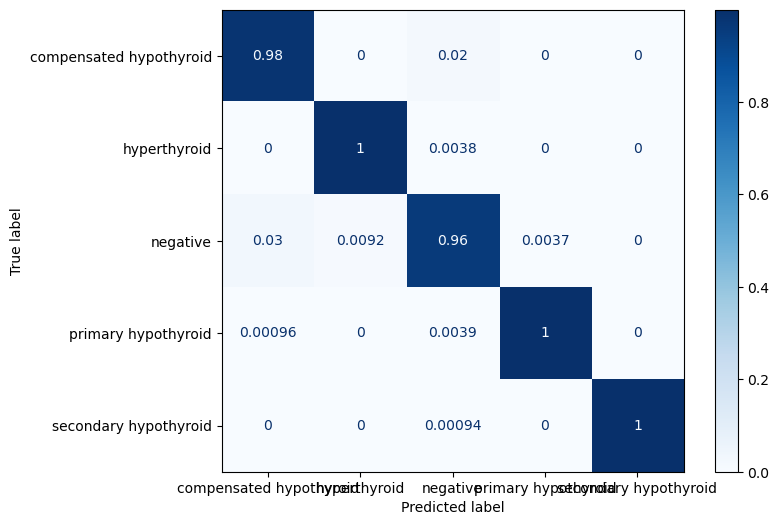

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best',)
dt.fit(X_train,y_train)

dt_prediction=dt.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(dt_prediction,y_test)
print(accuracy)

target_names=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid']
print(classification_report(y_test,dt_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, dt_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.9875448197773165
                         precision    recall  f1-score   support

compensated hypothyroid       0.97      0.98      0.98      1044
           hyperthyroid       0.99      1.00      1.00      1066
               negative       0.98      0.96      0.97      1086
    primary hypothyroid       1.00      1.00      1.00      1038
  secondary hypothyroid       1.00      1.00      1.00      1065

               accuracy                           0.99      5299
              macro avg       0.99      0.99      0.99      5299
           weighted avg       0.99      0.99      0.99      5299



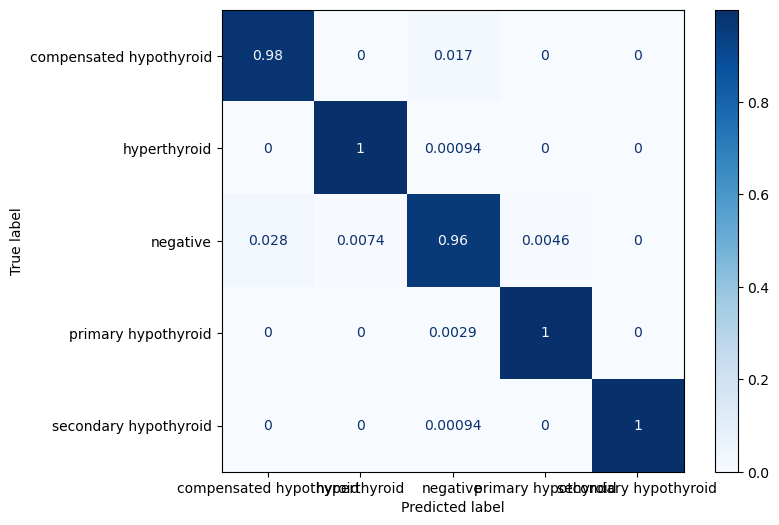

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,criterion='log_loss',max_features='log2',)
rf.fit(X_train,y_train)

rf_prediction=rf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(rf_prediction,y_test)
print(accuracy)

target_names=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid']
print(classification_report(y_test,rf_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, rf_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.3149650877524061
                         precision    recall  f1-score   support

compensated hypothyroid       0.06      0.07      0.06      1044
           hyperthyroid       0.03      0.07      0.04      1066
               negative       0.00      0.00      0.00      1086
    primary hypothyroid       0.99      0.66      0.79      1038
  secondary hypothyroid       0.97      0.78      0.87      1065

               accuracy                           0.31      5299
              macro avg       0.41      0.32      0.35      5299
           weighted avg       0.41      0.31      0.35      5299



/Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

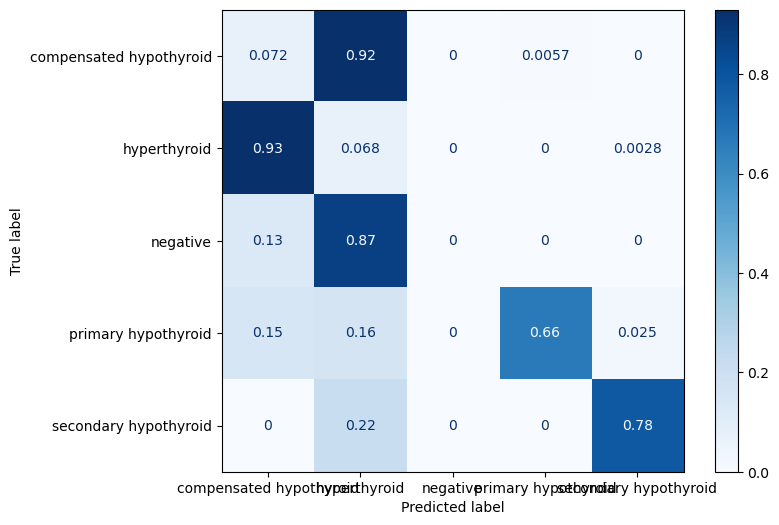

In [27]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
svm_prediction=svc.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(svm_prediction,y_test)
print(accuracy)

target_names=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid']
print(classification_report(y_test,svm_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, svm_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

In [28]:
!pip install shap

DEPRECATION: Loading egg at /Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/matplotlib-3.4.3-py3.11-macosx-11.1-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [29]:
from sklearn.metrics import classification_report

# Replace the roc_curve lines with the following:

# Get the classification report
report = classification_report(y_test, svm_prediction, target_names=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])

# Print the classification report
print(report)

                         precision    recall  f1-score   support

compensated hypothyroid       0.06      0.07      0.06      1044
           hyperthyroid       0.03      0.07      0.04      1066
               negative       0.00      0.00      0.00      1086
    primary hypothyroid       0.99      0.66      0.79      1038
  secondary hypothyroid       0.97      0.78      0.87      1065

               accuracy                           0.31      5299
              macro avg       0.41      0.32      0.35      5299
           weighted avg       0.41      0.31      0.35      5299



/Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anigaabhisathvikreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

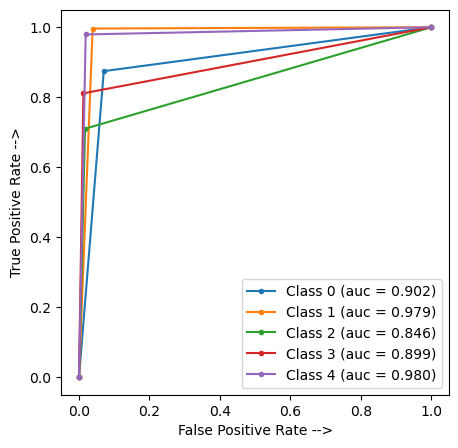

In [30]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
lr_prediction_bin = label_binarize(lr_prediction, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lr_prediction_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(5, 5), dpi=100)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label='Class %d (auc = %0.3f)' % (i, roc_auc[i]))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

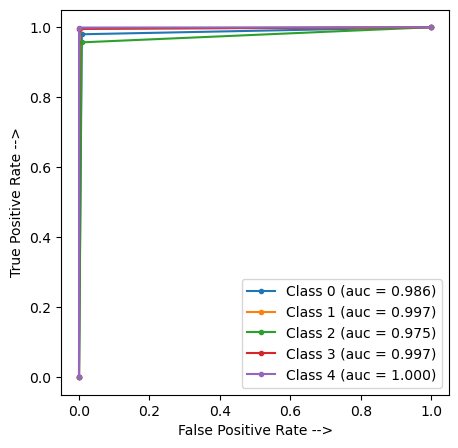

In [31]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
dt_prediction_bin = label_binarize(dt_prediction, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], dt_prediction_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(5, 5), dpi=100)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label='Class %d (auc = %0.3f)' % (i, roc_auc[i]))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

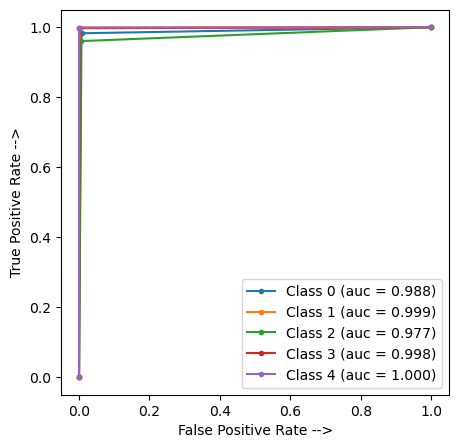

In [32]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
rf_prediction_bin = label_binarize(rf_prediction, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_prediction_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(5, 5), dpi=100)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label='Class %d (auc = %0.3f)' % (i, roc_auc[i]))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

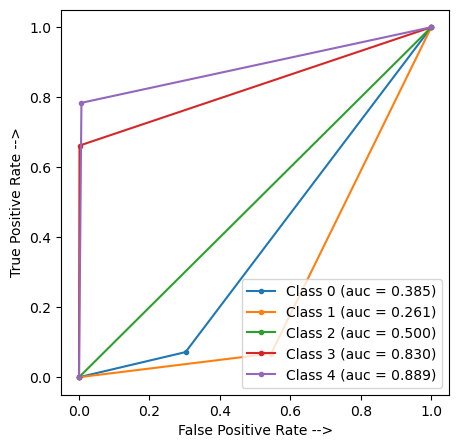

In [33]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
svm_prediction_bin = label_binarize(svm_prediction, classes=['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid'])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_prediction_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(5, 5), dpi=100)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label='Class %d (auc = %0.3f)' % (i, roc_auc[i]))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [39]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer`
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

In [ ]:
!pip install lime

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

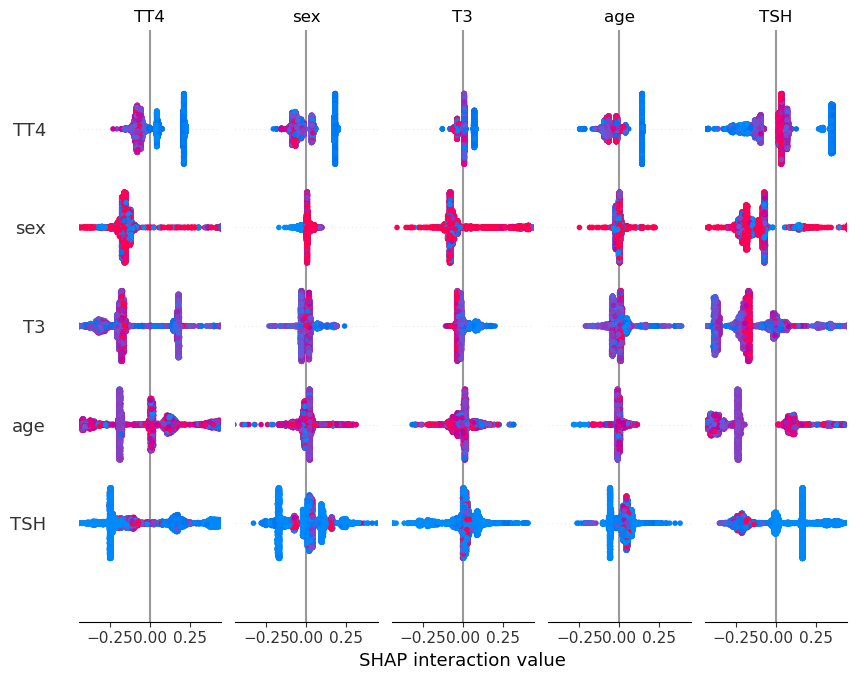

In [40]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [ ]:
!pip install lime

In [ ]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['compensated hypothyroid','hyperthyroid','negative','primary hypothyroid','secondary hypothyroid']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

In [ ]:
# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k
 
exp_lime = explainer.explain_instance(
    X_test[50], dt.predict, num_features=5)
 
# Finally visualizing the explanations
exp_lime.show_in_notebook(show_table=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt_clf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = dt_clf.predict(X_test)

print(classification_report(y_pred, y_test))

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf,
               	feature_names = feature_names,
               	class_names = class_names,
               	filled=True)